In [ ]:
"""
coins array = ('BTCUSDT','ETHUSDT','BNBUSDT','SOLUSDT','ADAUSDT','XRPUSDT','DOTUSDT',
                'LUNAUSDT','DOGEUSDT','AVAXUSDT','SHIBUSDT','MATICUSDT','LTCUSDT',
                'UNIUSDT','ALGOUSDT','TRXUSDT','LINKUSDT','MANAUSDT','ATOMUSDT','VETUSDT')

                
                                        Creation : DIMANCE 23 OCTOBRE 2022
                               STRATEGY VIZ
                               STRATEGY VIZ
               CROSS SMA 20-50-150-1440  and SQL LITE   DATA BASE            
               CROSS SMA 20-50-150-1440  and SQL LITE   DATA BASE            
               CROSS SMA 20-50-150-1440  and SQL LITE   DATA BASE            
               CROSS SMA 20-50-150-1440  and SQL LITE   DATA BASE                                                         
 
Date : DIMANCHE 13 oct 2022
YT :
AlgoVibes
9,3 k abonnés

Vid :

How To Build a CRYPTOCURRENCY INTRADAY Price Database using Python & SQL
How To Build a CRYPTOCURRENCY INTRADAY Price Database using Python & SQL

https://www.youtube.com/watch?v=vyHiWOS8yAc&t=95s
https://www.youtube.com/watch?v=vyHiWOS8yAc&t=95s
https://www.youtube.com/watch?v=vyHiWOS8yAc&t=95s

GitHub  : No
Colab   : No
Obsi    : No

coins array = ('BTCUSDT','ETHUSDT','BNBUSDT','SOLUSDT','ADAUSDT','XRPUSDT','DOTUSDT',
                'LUNAUSDT','DOGEUSDT','AVAXUSDT','SHIBUSDT','MATICUSDT','LTCUSDT',
                'UNIUSDT','ALGOUSDT','TRXUSDT','LINKUSDT','MANAUSDT','ATOMUSDT','VETUSDT')

"""

In [1]:
!pip install python-binance

In [4]:
symbol ='BTCUSDT'

In [3]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dimanche 23 octobre 2022 ....
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import sqlalchemy
# -- from sqlalchemy import create_engine
from binance import Client
# -- from binance.client import Client
from time import sleep

In [2]:
# LE SCREENER  2 ........................................................
# api_key ='GwvK4xNzrBr1HpEozMWx2AnWevMRlUZxPgroPvDcy2l4tqdzBH1eBa6PSpriyQTb'
# api_secret = 'DGij2y3b9teZHM0vrqafkGzuKbtKCM4wtI3RpA96DqPFNo433HCUJhs4cnSI3MQq'
# client = Client(api_key,api_secret)
client = Client()
# client.get_account()  # <<< Pour avoir le solde du compte BINANACE   ...

In [5]:
engine = sqlalchemy.create_engine('sqlite:///'+ symbol + 'stream.db')
# engine = sqlalchemy.create_engine('sqlite:///stream.db')

In [6]:
# LE SCREENER  2 ........................................................
# Function to get minute by minute...

# *** def getminutedata(symbol, interval, lookback):
# ***     frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback + ' min ago UTC'))  

def getminutedata(symbol, start): # Pour decouper (executer) mois par mois pour la data base sql ....

    end = str(pd.to_datetime(start) + MonthEnd(0))  # << -- Pour decouper (executer) mois par mois pour la data base sql ....

    frame = pd.DataFrame(client.get_historical_klines(symbol, '1m', start, end))  

    frame = frame.iloc[:,:6]  # Select First six colonnes .....
    frame.columns =['Time', 'Open', 'High', 'Low', 'Close', 'Volume'] # rename colonnes
    frame = frame.set_index('Time')  # Set time to index  ...
    frame.index = pd.to_datetime(frame.index, unit='ms') # reformat index ...
    frame = frame.astype(float)  # transform string to float
    return frame

In [7]:
getminutedata(symbol, '2021-10-01')

,Open,High,Low,Close,Volume
Time,,,,,
2022-10-01 00:00:00,19422.61,19423.93,19408.72,19414.02,157.68832
2022-10-01 00:01:00,19414.02,19422.01,19407.00,19419.61,159.59968
2022-10-01 00:02:00,19420.73,19423.27,19412.20,19417.56,171.10930
2022-10-01 00:03:00,19416.16,19425.24,19410.25,19412.65,208.77319
2022-10-01 00:04:00,19412.66,19426.17,19410.89,19425.54,146.23460
...,...,...,...,...,...
2022-10-23 16:33:00,19179.76,19183.18,19175.00,19182.21,104.62071
2022-10-23 16:34:00,19182.21,19186.74,19182.21,19183.63,71.58752
2022-10-23 16:35:00,19184.23,19188.27,19181.39,19183.42,57.58535


In [8]:
coins = ('BNBUSDT','SOLUSDT','ADAUSDT','XRPUSDT','DOTUSDT',
                'LUNAUSDT','DOGEUSDT','AVAXUSDT','SHIBUSDT','MATICUSDT','LTCUSDT')
# coins = ('BTCUSDT','ETHUSDT','BNBUSDT','SOLUSDT','ADAUSDT')
# coins = ('BTCUSDT','ETHUSDT')

In [9]:
daterange = pd.date_range('2021-10-01', pd.to_datetime('today'), freq='MS')

In [10]:
# engine = sqlalchemy.create_engine('sqlite:///'+ symbol + 'stream.db')
for coin in coins:
    for date in daterange:
        print(f'In processing for {date.month_name()} and for  {coin} ...')
        df = getminutedata(coin, str(date))
        df.to_sql(coin, engine, if_exists='append', index=True)
        sleep(30)  # 30 secondes ...
    print(f'Finished . {coin}  correctement enregistre dans la Data Base stream .DB ')

In processing for October and for  BNBUSDT ...
In processing for November and for  BNBUSDT ...
In processing for December and for  BNBUSDT ...
In processing for January and for  BNBUSDT ...
In processing for February and for  BNBUSDT ...
In processing for March and for  BNBUSDT ...
In processing for April and for  BNBUSDT ...
In processing for May and for  BNBUSDT ...
In processing for June and for  BNBUSDT ...
In processing for July and for  BNBUSDT ...
In processing for August and for  BNBUSDT ...
In processing for September and for  BNBUSDT ...
In processing for October and for  BNBUSDT ...
Finished . BNBUSDT  correctement enregistre dans la Data Base stream .DB 
In processing for October and for  SOLUSDT ...
In processing for November and for  SOLUSDT ...
In processing for December and for  SOLUSDT ...
In processing for January and for  SOLUSDT ...
In processing for February and for  SOLUSDT ...
In processing for March and for  SOLUSDT ...
In processing for April and for  SOLUSDT .

In [8]:
pd.read_sql('SELECT * FROM BTCUSDT', engine)

,Time,Open,High,Low,Close,Volume
0,2022-10-01 00:00:00.000000,19422.61,19423.93,19408.72,19414.02,157.68832
1,2022-10-01 00:01:00.000000,19414.02,19422.01,19407.00,19419.61,159.59968
2,2022-10-01 00:02:00.000000,19420.73,19423.27,19412.20,19417.56,171.10930
3,2022-10-01 00:03:00.000000,19416.16,19425.24,19410.25,19412.65,208.77319
4,2022-10-01 00:04:00.000000,19412.66,19426.17,19410.89,19425.54,146.23460
...,...,...,...,...,...,...
32674,2022-10-23 16:34:00.000000,19182.21,19186.74,19182.21,19183.63,71.58752
32675,2022-10-23 16:35:00.000000,19184.23,19188.27,19181.39,19183.42,57.58535
32676,2022-10-23 16:36:00.000000,19183.42,19184.97,19182.00,19182.79,29.82941
32677,2022-10-23 16:37:00.000000,19183.53,19186.10,19182.16,19185.35,63.97784


In [377]:
# df2 = pd.read_sql('SELECT * FROM BTCUSDT', engine)
df2 = pd.read_sql('SELECT * FROM ETHUSDT', engine)

In [378]:
df2 = df2.set_index('Time')  # Set time to index  ...

In [379]:
df2

,Open,High,Low,Close,Volume
Time,,,,,
2021-10-01 00:00:00.000000,3000.62,3000.90,2997.49,2998.84,265.3891
2021-10-01 00:01:00.000000,2999.17,3006.47,2999.17,3006.37,480.9818
2021-10-01 00:02:00.000000,3006.15,3015.97,3001.28,3015.97,796.9026
2021-10-01 00:03:00.000000,3015.97,3020.08,3011.59,3019.25,907.8069
2021-10-01 00:04:00.000000,3019.25,3026.78,3015.87,3024.10,688.7778
...,...,...,...,...,...
2022-10-25 12:19:00.000000,1348.24,1348.33,1348.23,1348.33,63.7800
2022-10-25 12:20:00.000000,1348.33,1348.60,1348.24,1348.25,156.6620
2022-10-25 12:21:00.000000,1348.24,1348.25,1348.00,1348.01,84.2813


In [10]:
prices_resample = df2

In [19]:
prices_resample['MA20'] = prices_resample['Close'].rolling(20).mean()
prices_resample['MA50'] = prices_resample['Close'].rolling(50).mean()
# prices_resample['MA150'] = prices_resample['Close'].rolling(150).mean()

In [20]:
prices_resample['MA150'] = prices_resample['Close'].rolling(150).mean()

In [21]:
prices_resample['MA1400'] = prices_resample['Close'].rolling(1440).mean() # 1440 minutes = 24 H = 1 Jour  !!!

In [22]:
prices_resample['MA10K'] = prices_resample['Close'].rolling(10000).mean() # 10K minutes = 7 Jours = 1 semaine !!!

In [23]:
# Calculate  MACD  ...
# Autor YT : Learn Python with Rune
# 48,9 k abonnés
# MACD and Stochastic Oscillator | Full Course | Part 7/8 | Financial Data Analysis with Python ...
# https://www.youtube.com/watch?v=jddmdKDq_VQ
# https://www.youtube.com/watch?v=jddmdKDq_VQ
exp1 = prices_resample['Close'].ewm(span=12, adjust=False).mean()
exp2 = prices_resample['Close'].ewm(span=26, adjust=False).mean()
prices_resample['MACD'] = exp1 - exp2
prices_resample['MACD Signal'] = prices_resample['MACD'].ewm(span=9, adjust=False).mean()

<AxesSubplot:>

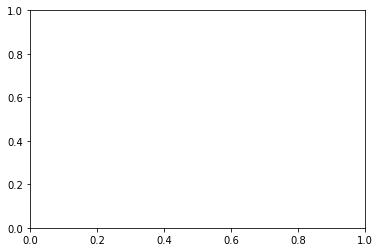

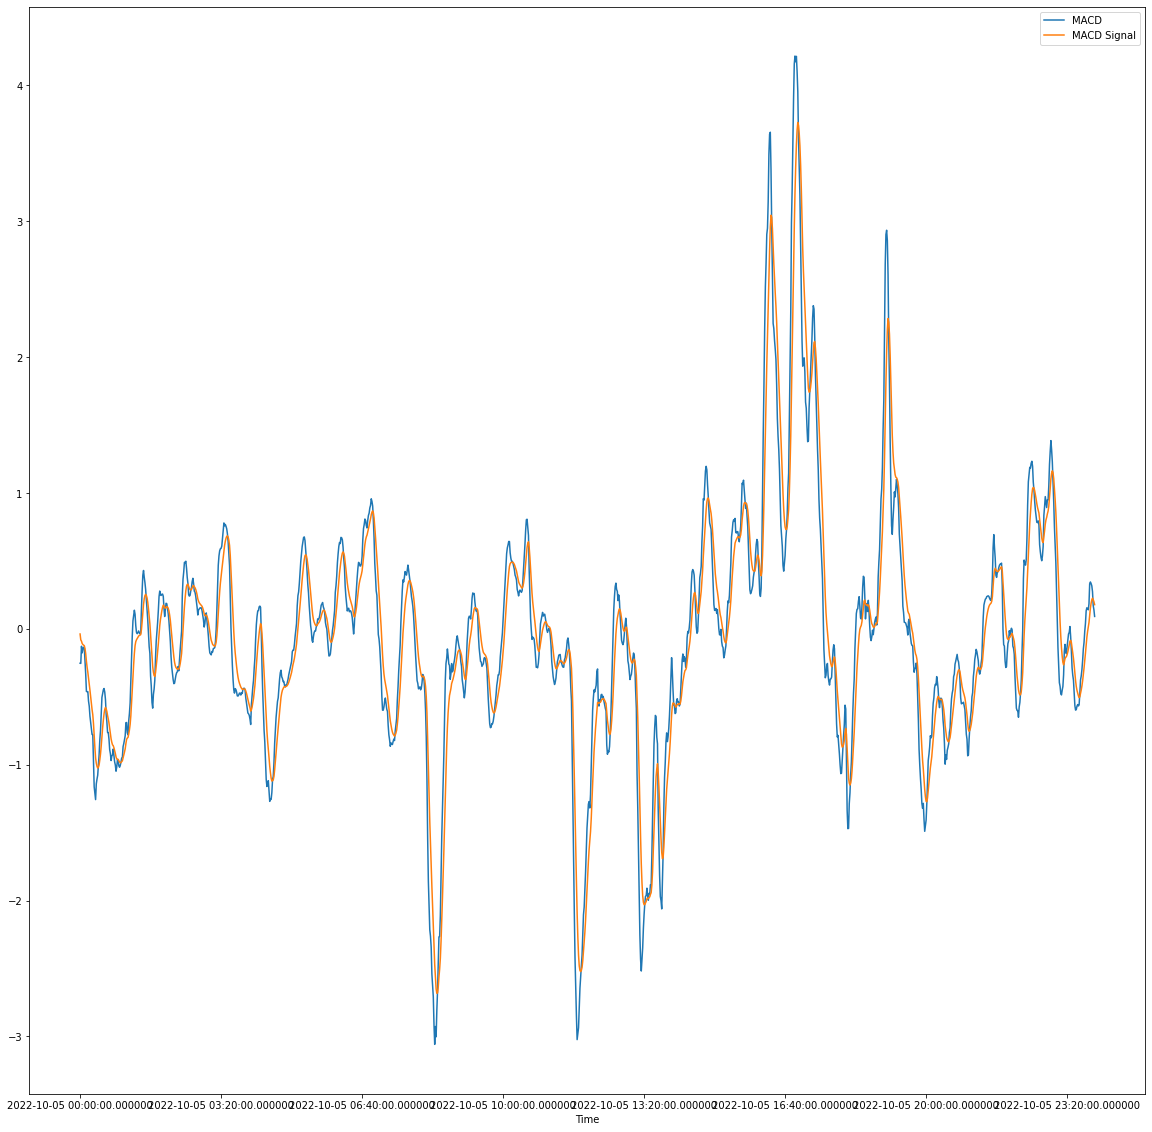

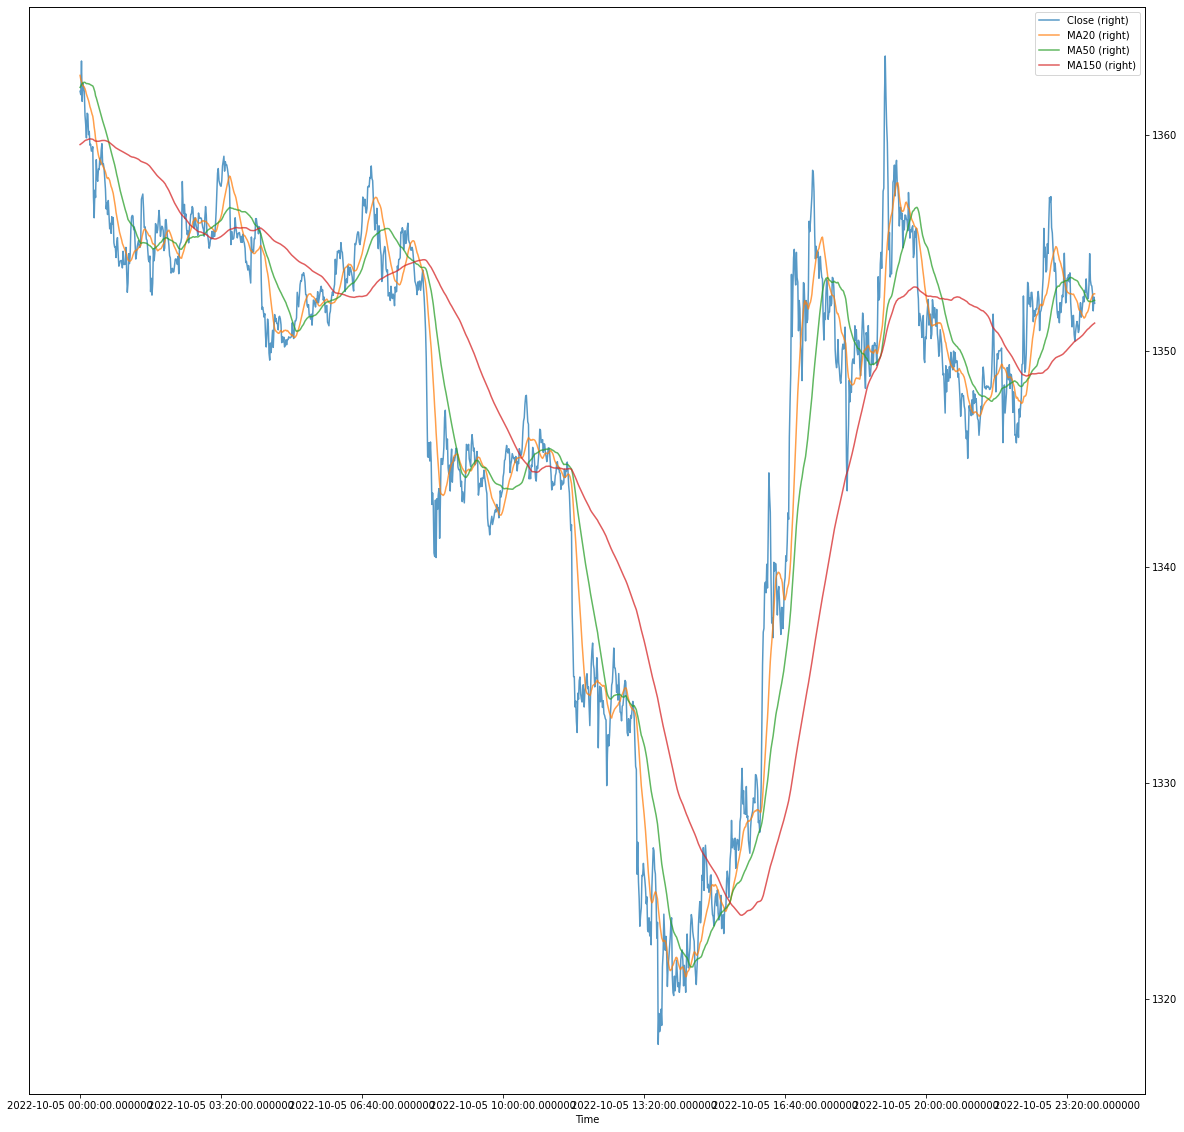

In [31]:
#  Plot   MACD   ...
# Autor YT : Learn Python with Rune
# 48,9 k abonnés
# MACD and Stochastic Oscillator | Full Course | Part 7/8 | Financial Data Analysis with Python ...
# https://www.youtube.com/watch?v=jddmdKDq_VQ
# https://www.youtube.com/watch?v=jddmdKDq_VQ
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# prices_resample[['Close','MA20','MA50','MA150','MA1400','MA10K']]['2022-10-05':'2022-10-22'].plot(figsize=(20,20))
#prices_resample[['MACD','MACD Signal']].plot(ax=ax)
prices_resample[['MACD','MACD Signal']]['2022-10-05':'2022-10-06'].plot(figsize=(20,20))
# prices_resample[['Close','MA20','MA50','MA150','MA1400','MA10K']]['2022-10-05':'2022-10-06'].plot(alpha=0.75, secondary_y=True, figsize=(20,20))
prices_resample[['Close','MA20','MA50','MA150']]['2022-10-05':'2022-10-06'].plot(alpha=0.75, secondary_y=True, figsize=(20,20))

In [3]:
import matplotlib.pyplot as plt

In [49]:
# Pour normaliser les data sur le meme axe si necessaire ...
# Python, Matplotlib: Normalising multiple plots to fit the same arbitrary axis limits
# https://stackoverflow.com/questions/43280854/python-matplotlib-normalising-multiple-plots-to-fit-the-same-arbitrary-axis-li
# https://stackoverflow.com/questions/43280854/python-matplotlib-normalising-multiple-plots-to-fit-the-same-arbitrary-axis-li
def norm(data): 
    return (data)/(max(data)-min(data))

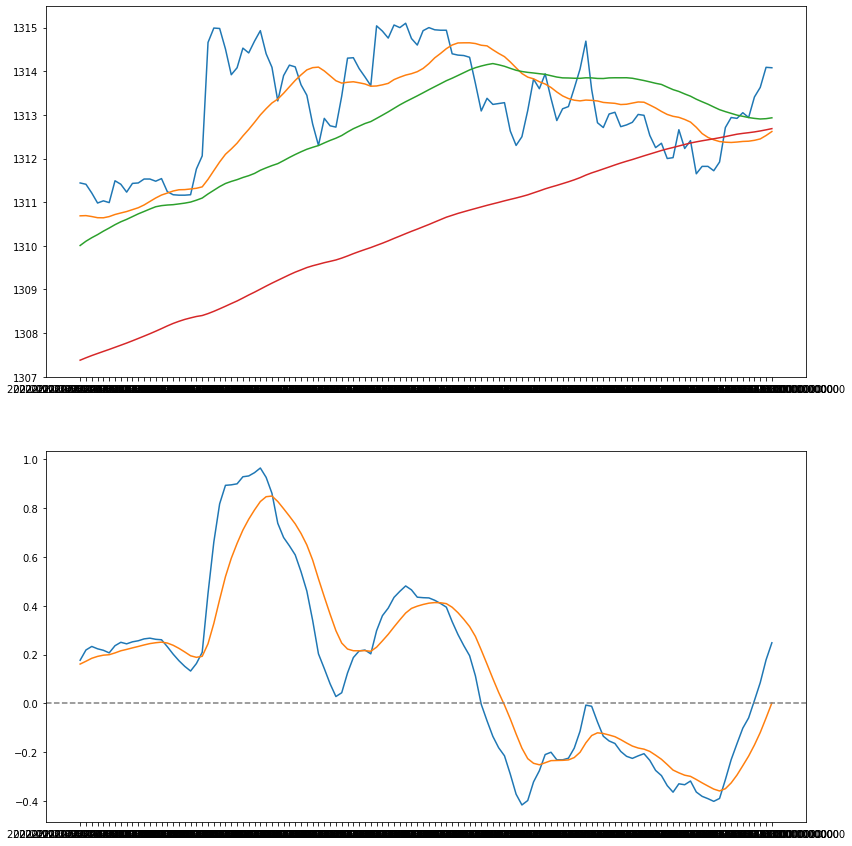

In [53]:
    # MEAN REVERSE-SCREENER-CRYPTO-1-MINUTE .ipynb
    # MEAN REVERSE-SCREENER-CRYPTO-1-MINUTE .ipynb
    # MEAN REVERSE-SCREENER-CRYPTO-1-MINUTE .ipynb
    # Plot trades on time series
    # plt.rcParams['figure.figsize'] = 12, 6
    # define subplots and their positions in figure
    # create a figure
    # https://www.geeksforgeeks.org/graph-plotting-python-set-2/..
    fig = plt.figure(figsize = (30,15))  # figsize = (Largeur Ecran: 30, Hauteur Ecran: 15)
    #fig = plt.figure()  # figsize = (Largeur Ecran: 30, Hauteur Ecran: 15)
    plt1 = fig.add_subplot(221)
    
    #plt2 = fig.add_subplot(222)
    plt3 = fig.add_subplot(223)
    #plt4 = fig.add_subplot(224)
    #.back = 360 * 3  # (360 = 6H )
    back = 60 *2   # (360 = 6H )    
    #plt.rcParams['figure.figsize'] = 20, 10
    #plt.grid(True, alpha = .3)
    # plt.plot(gld.iloc[-252:]['Close'], label = 'GLD')
    #plt1.plot(prices_resample['Close'], label = ticker) 
    plt1.plot(prices_resample['Close'][-back:]) 
    plt1.plot(prices_resample['MA20'][-back:]) 
    plt1.plot(prices_resample['MA50'][-back:])
    plt1.plot(prices_resample['MA150'][-back:])

    #. plt1.plot(gld[-252:].loc[gld.entry == 2].index, gld[-252:]['9-day'][gld.entry == 2], '^',
    #.      color = 'g', markersize = 12)
    #. plt1.plot(gld[-252:].loc[gld.entry == -2].index, gld[-252:]['21-day'][gld.entry == -2], 'v',
    #.      color = 'r', markersize = 12)
    #. plt1.legend(loc=2);    


    plt3.plot(prices_resample['MACD'][-back:])  
    plt3.plot(prices_resample['MACD Signal'][-back:], label = 'MACD Signal')  

    plt3.axhline(0, c= (.5,.5,.5), ls='--')           
    # display 1.
    #plt.figure(figsize = (20,10))
    #plt.title('Opening Prices from {} to {}'.format(start_date,
    #                                            end_date))
    #plt.plot(data['Close'])
    #plt1.show()

In [33]:
prices_resample

,Open,High,Low,Close,Volume,MA20,MA50,MA150,MA1400,MA10K,MACD,MACD Signal
Time,,,,,,,,,,,,
2022-10-01 00:00:00.000000,1328.71,1328.72,1327.73,1327.99,215.5041,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2022-10-01 00:01:00.000000,1328.00,1328.17,1327.79,1328.17,59.7123,NaN,NaN,NaN,NaN,NaN,0.014359,0.002872
2022-10-01 00:02:00.000000,1328.16,1328.50,1328.16,1328.49,51.0826,NaN,NaN,NaN,NaN,NaN,0.050972,0.012492
2022-10-01 00:03:00.000000,1328.50,1329.19,1328.32,1328.43,217.6860,NaN,NaN,NaN,NaN,NaN,0.074291,0.024852
2022-10-01 00:04:00.000000,1328.44,1329.28,1328.43,1329.28,165.9687,NaN,NaN,NaN,NaN,NaN,0.159520,0.051785
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-23 16:35:00.000000,1313.05,1313.06,1312.94,1312.94,35.1073,1312.3970,1312.9386,1312.592000,1311.124465,1304.136502,-0.058904,-0.215330
2022-10-23 16:36:00.000000,1312.95,1313.66,1312.94,1313.41,540.1377,1312.4170,1312.9196,1312.609667,1311.124035,1304.139368,0.012213,-0.169821
2022-10-23 16:37:00.000000,1313.40,1313.64,1313.40,1313.63,130.3634,1312.4490,1312.9058,1312.631933,1311.124451,1304.142283,0.085343,-0.118789


<AxesSubplot:xlabel='Time'>

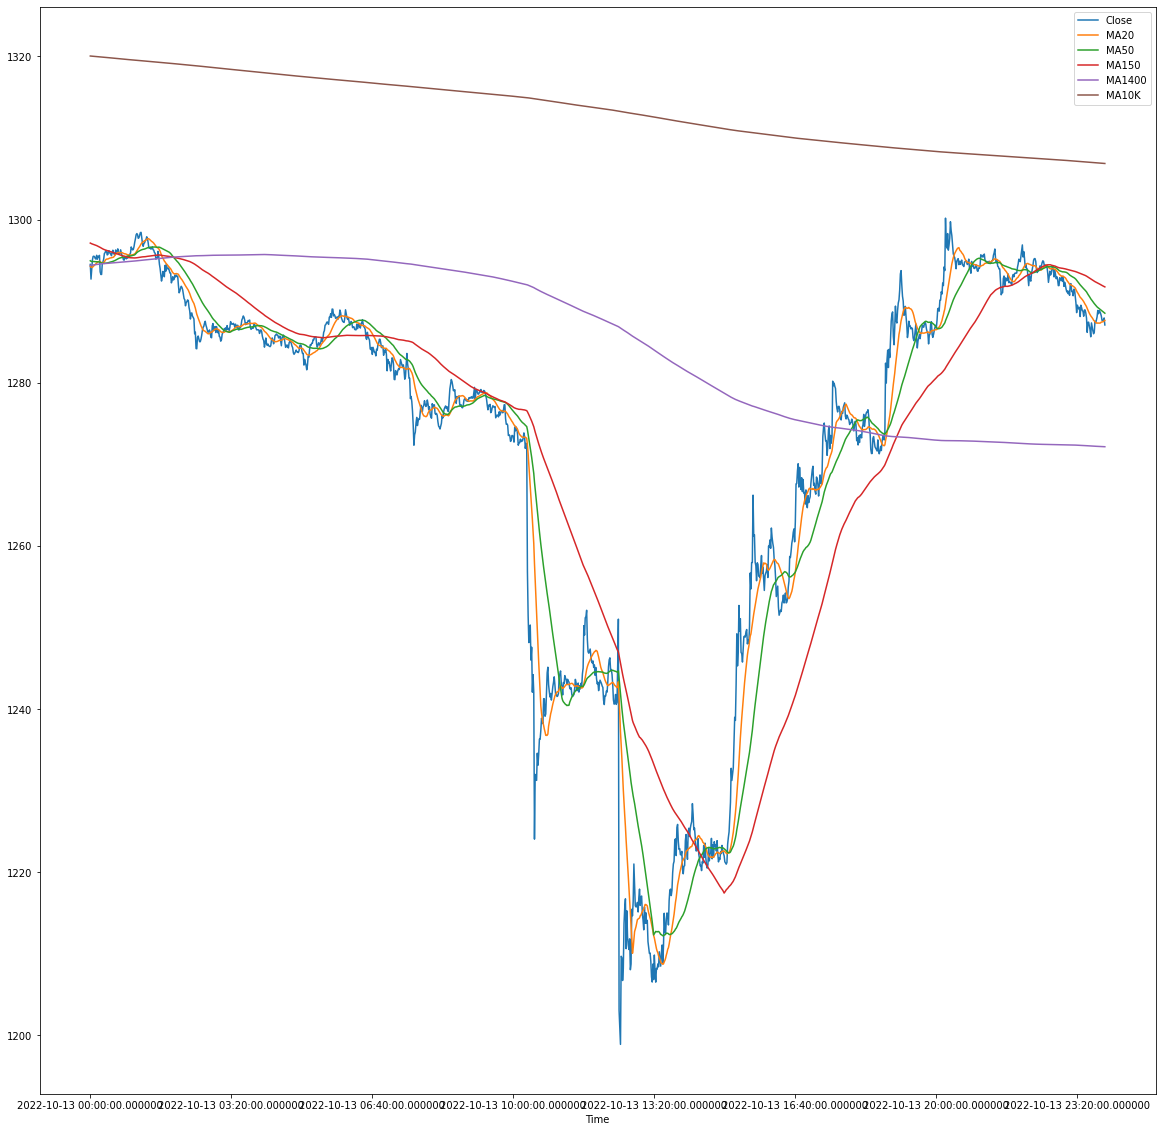

In [34]:
# prices_resample[['price','MA20','MA50','ATR SL achat']]['2022-03-01':"2022-04-01"].plot(figsize=(18,10))
# prices_resample[['Close','MA20','MA50','MA150','MA1400','MA10K']]['2022-10-05':'2022-10-22'].plot(figsize=(20,20))
prices_resample[['Close','MA20','MA50','MA150','MA1400','MA10K']]['2022-10-13':'2022-10-14'].plot(figsize=(20,20))
# prices_resample[['Close','MA20','MA50','MA150','MA1400']]['2022-10-01':'2022-10-22'].plot(figsize=(20,20))

In [ ]:
"""
                                        Creation : VENDREDI 21 OCTOBRE 2022
                               STRATEGY CROSS SMA  -  VIZ
                               STRATEGY CROSS SMA  -  VIZ       

Date : vendredi 21 oct 2022
YT :

Adverse Selection
331 abonnés !!!

Vid :
QUE VAUT LA STRATÉGIE DE TRADING DE @DATA TRADER ? - MOVING AVERAGE
QUE VAUT LA STRATÉGIE DE TRADING DE @DATA TRADER ? - MOVING AVERAGE
QUE VAUT LA STRATÉGIE DE TRADING DE @DATA TRADER ? - MOVING AVERAGE

https://www.youtube.com/watch?v=78hOUUfeaWI&t=761s
https://www.youtube.com/watch?v=78hOUUfeaWI&t=761s
https://www.youtube.com/watch?v=78hOUUfeaWI&t=761s

GitHub  : No
Colab   : YES  --  STRATEGIE DE DATA TRADER vendredi 21 Oct 2022.ipynb
Obsi    : YES

"""


"""
LINK TO : 
STRATEGIE DE DATA TRADER vendredi 21 Oct 2022.ipynb
"""

ATR - STOP LOSS 

In [88]:
# 9 min 25 secondes
# https://www.incrediblecharts.com/indicators/macd.php   calculate ATR, MACD,  ...
# https://www.incrediblecharts.com/indicators/macd.php   calculate ATR, MACD,  ...

def compute_ATR(prices):
    prices = pd.DataFrame(prices_resample.loc[prices.index])
    # close = prices['price'].iloc[0].item()
    close = prices['Close'].iloc[0].item()    
    high = prices['High'].iloc[1:].max()
    low = prices['Low'].iloc[1:].min()
    case_1 = high - low    
    case_2 = abs(high - close)
    case_3 = abs(low - close)    
    return max(case_1, case_2, case_3) * 3 # <<-- MULTIPLICATEUR POUR ATR... 
def compute_SL_achat(prices):
    prices  = prices_resample.loc[prices.index]
    return prices['ATR'].iloc[1].item() + prices['Close'].iloc[0].item()

def compute_SL_vente(prices):
    prices  = prices_resample.loc[prices.index]
    return prices['Close'].iloc[0].item() + prices['ATR'].iloc[1].item()

In [89]:
period = 5  # <<--  PERIODES POUR ATR ...
prices_resample['ATR'] = prices_resample['Close'].rolling(period + 1).apply(compute_ATR)
prices_resample['ATR SL achat'] = prices_resample['Close'].rolling(2).apply(compute_SL_achat)
prices_resample['ATR SL vente'] = prices_resample['Close'].rolling(2).apply(compute_SL_vente)

# prices_resample.drop(['High','Low'], axis = 1, inplace = True)

<AxesSubplot:xlabel='Time'>

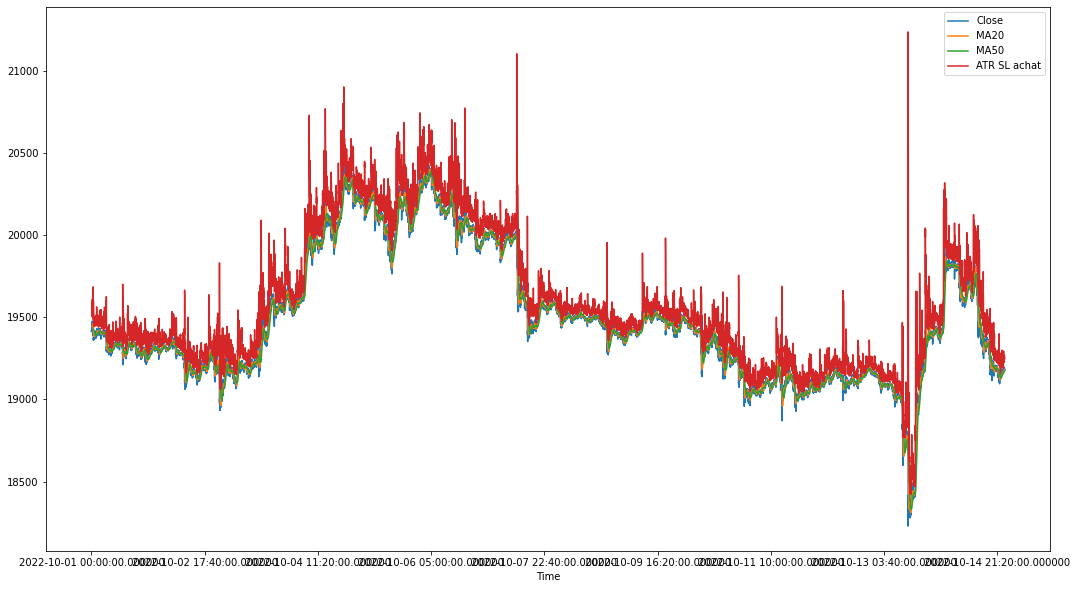

In [90]:
prices_resample[['Close','MA20','MA50','ATR SL achat']]['2022-10-01':"2022-10-15"].plot(figsize=(18,10))

In [ ]:
# prices_trading_full = Data Frame avec 260_640 lignes  et  8 colonnes,  index = time (dates) !!!

prices_trading_full = prices_trading.join(prices_resample.drop("Close", axis = 1)).ffill().bfill()

# EXECUTION -TRAITEMENT - ( BASE MINUTE ) -- 

In [91]:

prices_trading_full = prices_resample

In [92]:
prices_trading_full

,Open,High,Low,Close,Volume,MA20,MA50,MA150,MA1400,ATR,ATR SL achat,ATR SL vente
Time,,,,,,,,,,,,
2022-10-01 00:00:00.000000,19422.61,19423.93,19408.72,19414.02,157.68832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01 00:01:00.000000,19414.02,19422.01,19407.00,19419.61,159.59968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01 00:02:00.000000,19420.73,19423.27,19412.20,19417.56,171.10930,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01 00:03:00.000000,19416.16,19425.24,19410.25,19412.65,208.77319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01 00:04:00.000000,19412.66,19426.17,19410.89,19425.54,146.23460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-23 10:35:00.000000,19174.74,19175.80,19173.71,19175.80,22.39186,19175.5490,19178.7732,19177.744933,19189.238889,26.16,19200.54,19200.54
2022-10-23 10:36:00.000000,19175.54,19177.10,19172.46,19174.59,86.09014,19175.3345,19178.6330,19177.886533,19189.249576,15.45,19191.25,19191.25
2022-10-23 10:37:00.000000,19174.59,19175.47,19173.00,19174.88,50.06652,19175.2215,19178.4932,19178.030933,19189.261111,13.92,19188.51,19188.51


In [123]:
#from uuid import uuid4
import uuid
import uuid
#pip ninstall uuid4

In [124]:
# FREQUENCE PAR MINUTES  ... DANS LE TRADE EN COURS ...
trading = False  # < - in_position ...
initial_state = prices_resample.iloc[0]
price = prices_resample['Close']
current_MA_state = "short" if initial_state['MA20'] < initial_state['MA50'] else "long"
entry_price = None
position = None  # < - Long or short  ...

dates = prices_trading_full.index[1:]

bkk = pd.DataFrame()  # << -- Book keeping,  bkk ...

for time in dates:
    market_state = prices_trading_full.loc[time]
    
    current_high = market_state['High']
    current_low = market_state['Low']    
    current_close = market_state['Close']
    current_price = (current_high + current_low) / 2  # <- prix moyen entre high et low !!!
    SL_long = market_state['ATR SL achat']
    SL_short = market_state['ATR SL vente']        
    old_SMA_state = current_MA_state
    current_MA_state = "short" if market_state['MA20'] < market_state['MA50'] else "long"
    if not trading:
        if old_SMA_state != current_MA_state:  # < - signal de crossing SMA ...
            position = current_MA_state
            entry_trade_price = current_price
            trading = True
            if position == "short":
                stop_loss = SL_short
            else:
                stop_loss = SL_long
            trade_id = str(uuid.uuid4())
            #trade_id = 'test'
            booked_pos = pd.DataFrame({'action': ["open"],
                                       "id" : [trade_id],
                                       "side" : [position],
                                       "SL" : [stop_loss],
                                       "price" : [entry_trade_price]}, index = [time])
            bkk = pd.concat([bkk, booked_pos])

    else:  # <-- Si trade en cours  ...
        high_price_above = stop_loss <= current_high  # <- Si hit stop Loss ... 
        low_price_below = stop_loss >= current_low 

        adjust_SL_long = SL_long > stop_loss  # <- ajuster stop loss ...
        adjust_SL_short = SL_short < stop_loss
        price = current_close
        if position == "long": # <- IF long ...
            if low_price_below:
                action = 'close'
                entry_trade_price = None
                trading = False
                price = stop_loss
            elif adjust_SL_long:
                action = 'adjust'
                stop_loss = SL_long
            else:
                action = 'keep'   

        else:   # <- IF short ...
            if high_price_above:
                action = 'close'
                entry_trade_price = None
                trading = False
                price = stop_loss
            elif adjust_SL_short:
                action = 'adjust'
                stop_loss = SL_short
            else:
                action = 'keep'    

        booked_pos = pd.DataFrame({'action': [action],
                                       "id" : [trade_id],
                                       "side" : [position],
                                       "SL" : [stop_loss],
                                       "price" : [price]}, index = [time])
        bkk = pd.concat([bkk, booked_pos])
        if not trading:
            trade_id = None

# 14 min 53 secondes   ....

In [132]:
bkk

,action,id,side,SL,price
2022-10-01 00:49:00.000000,open,132f654e-e4f4-41a2-a377-626301bb80da,short,19457.23,19374.285
2022-10-01 00:50:00.000000,keep,132f654e-e4f4-41a2-a377-626301bb80da,short,19457.23,19381.880
2022-10-01 00:51:00.000000,keep,132f654e-e4f4-41a2-a377-626301bb80da,short,19457.23,19383.670
2022-10-01 00:52:00.000000,keep,132f654e-e4f4-41a2-a377-626301bb80da,short,19457.23,19393.740
2022-10-01 00:53:00.000000,keep,132f654e-e4f4-41a2-a377-626301bb80da,short,19457.23,19398.630
...,...,...,...,...,...
2022-10-23 10:35:00.000000,keep,efde66d4-def8-4a25-a98f-862d97fa3f52,short,19189.34,19175.800
2022-10-23 10:36:00.000000,keep,efde66d4-def8-4a25-a98f-862d97fa3f52,short,19189.34,19174.590
2022-10-23 10:37:00.000000,adjust,efde66d4-def8-4a25-a98f-862d97fa3f52,short,19188.51,19174.880
2022-10-23 10:38:00.000000,keep,efde66d4-def8-4a25-a98f-862d97fa3f52,short,19188.51,19174.140


In [126]:
prices_trading = prices_resample   # prices_trading_full = prices_resample

In [129]:
trades = bkk[bkk['action'].isin(['open','close'])]  # <- Select, filtrer only open actions and close actions..
returns = trades[['id', 'price']].groupby('id').pct_change().dropna().join(trades['id'])  # <- les gains ...
# returns_per_month = (returns['price'] + 1).resample("M").prod() - 1    # <- les gains par mois ...
# market_ret = (1 + prices_trading['Close'].pct_change()).resample("M").prod()  # <- les gains du marche ...

In [130]:
#import matplotlib as plt
import matplotlib.pyplot as plt

In [131]:
date_from = '2022-10-01'
date_to = "2022-10-15"

plotter = prices_resample[['Close', 'MA50', 'MA20']][date_from:date_to]

# plotter_pnl = (1 + returns['Close']).cumprod()[date_from:date_to] - 1

plotter = plotter.join(bkk['SL'])

trades_open_l = trades[(trades['action'] == 'open') & (trades['side'] == 'long')][date_from:date_to]
trades_close_l = trades[(trades['action'] == 'close') & (trades['side'] == 'long')][date_from:date_to]
trades_open_c = trades[(trades['action'] == 'open') & (trades['side'] == 'short')][date_from:date_to]
trades_close_c = trades[(trades['action'] == 'close') & (trades['side'] == 'short')][date_from:date_to]
s = 250

fig, axs = plt.subplots(2, figsize=(18,14), gridspec_kw={'height_ratios': [3,1]} )
axs[0].plot(plotter.index, plotter['Close'], linestyle=('solid'), color = 'black', label = 'BTC/USDT')
axs[0].plot(plotter.index, plotter['MA50'], linestyle=('solid'), color = 'green', label = 'MA50')
axs[0].plot(plotter.index, plotter['MA20'], linestyle=('solid'), color = 'red', label = 'MA20')
axs[0].plot(plotter.index, plotter['SL'], linestyle=('dashed'), color = 'blue', label = 'Stop_Loss')

# axs[0].scatter(trades_open_l.index, trades_open_l['price'], marker = '^', color = 'green', s = s)
# axs[0].scatter(trades_close_l.index, trades_close_l['price'], marker = 'v', color = 'green', s = s)
# axs[0].scatter(trades_open_c.index, trades_open_c['price'], marker = 'v', color = 'red', s = s)
# axs[0].scatter(trades_close_c.index, trades_close_c['price'], marker = '^', color = 'red', s = s)

# axs[1].plot(plotter_pnl.index, plotter_pnl, linestyle=('solid'), color = 'black', label = 'PnL')
axs[0].legend()
axs[1].legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


KeyboardInterrupt: 

In [ ]:
"""
coins array = ('BTCUSDT','ETHUSDT','BNBUSDT','SOLUSDT','ADAUSDT','XRPUSDT','DOTUSDT',
                'LUNAUSDT','DOGEUSDT','AVAXUSDT','SHIBUSDT','MATICUSDT','LTCUSDT',
                'UNIUSDT','ALGOUSDT','TRXUSDT','LINKUSDT','MANAUSDT','ATOMUSDT','VETUSDT')

                
                                        Creation : LUNDI 24 OCTOBRE 2022
                               NEW STRATEGY NEW VIZ
                               NEW STRATEGY NEW VIZ
 
Date : LUNDI 24 oct 2022
YT :
AlgoVibes
9,3 k abonnés

Vid :

INTRADAY Trading Strategy on CRYPTOcurrencies implemented in Python 
[highly recommended to watch]
INTRADAY Trading Strategy on CRYPTOcurrencies implemented in Python 
[highly recommended to watch]

https://www.youtube.com/watch?v=xy4gpC4rCZ8
https://www.youtube.com/watch?v=xy4gpC4rCZ8
https://www.youtube.com/watch?v=xy4gpC4rCZ8

GitHub  : No
Colab   : No
Obsi    : No

coins array = ('BTCUSDT','ETHUSDT','BNBUSDT','SOLUSDT','ADAUSDT','XRPUSDT','DOTUSDT',
                'LUNAUSDT','DOGEUSDT','AVAXUSDT','SHIBUSDT','MATICUSDT','LTCUSDT',
                'UNIUSDT','ALGOUSDT','TRXUSDT','LINKUSDT','MANAUSDT','ATOMUSDT','VETUSDT')

"""

In [333]:
# symbol = 'ETHUSDT'
# symbol = 'SOLUSDT'  # res 1.08 de juin 2022 ...
symbol = 'BTCUSDT'  # res 1.08 de juin 2022 ...

In [241]:
# LE SCREENER  2 ........................................................
# Function to get minute by minute...

# *** def getminutedata(symbol, interval, lookback):
# ***     frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback + ' min ago UTC'))  

def getminutedata(symbol, start): # Pour decouper (executer) mois par mois pour la data base sql ....

    #.end = str(pd.to_datetime(start) + MonthEnd(0))  # << -- Pour decouper (executer) mois par mois pour la data base sql ....

    #.frame = pd.DataFrame(client.get_historical_klines(symbol, '1m', start, end))  
    frame = pd.DataFrame(client.get_historical_klines(symbol, '1m', start))      #  1d for day  ...

    frame = frame.iloc[:,:6]  # Select First six colonnes .....
    frame.columns =['Time', 'Open', 'High', 'Low', 'Close', 'Volume'] # rename colonnes
    frame = frame.set_index('Time')  # Set time to index  ...
    frame.index = pd.to_datetime(frame.index, unit='ms') # reformat index ...
    frame = frame.astype(float)  # transform string to float
    return frame

In [334]:
df2 = getminutedata(symbol, '2021-10-01')  #  getminutedata('ETHUSDT', '2022-05-01')

In [102]:
# df2 = pd.read_sql('SELECT * FROM BTCUSDT', engine)
#df2 = pd.read_sql('SELECT * FROM ETHUSDT', engine)
df2 = pd.read_sql('SELECT * FROM ETHUSDT', engine)
#df2 = pd.read_sql('SELECT * FROM MATICUSDT', engine)
#df2 = pd.read_sql('SELECT * FROM XRPUSDT', engine)
df2 = df2.set_index('Time')  # Set time to index  ...

In [370]:
df2

,Open,High,Low,Close,Volume
Time,,,,,
2021-10-01 00:00:00.000000,3000.62,3000.90,2997.49,2998.84,265.3891
2021-10-01 00:01:00.000000,2999.17,3006.47,2999.17,3006.37,480.9818
2021-10-01 00:02:00.000000,3006.15,3015.97,3001.28,3015.97,796.9026
2021-10-01 00:03:00.000000,3015.97,3020.08,3011.59,3019.25,907.8069
2021-10-01 00:04:00.000000,3019.25,3026.78,3015.87,3024.10,688.7778
...,...,...,...,...,...
2022-10-25 12:19:00.000000,1348.24,1348.33,1348.23,1348.33,63.7800
2022-10-25 12:20:00.000000,1348.33,1348.60,1348.24,1348.25,156.6620
2022-10-25 12:21:00.000000,1348.24,1348.25,1348.00,1348.01,84.2813


In [103]:
df = df2

In [126]:
df['MA4K'] = df['Close'].rolling(4000).mean() # 1440 minutes = 24 H = 1 Jour  !!!
df['MA7K'] = df['Close'].rolling(7000).mean() # 1440 minutes = 24 H = 1 Jour  !!!
df['MA10K'] = df['Close'].rolling(10000).mean() # 1440 minutes = 24 H = 1 Jour  !!!


In [127]:
df['10m_ret'] = df.Close/df.Close.shift(10) - 1
df['5m_ret'] = df.Close/df.Close.shift(5) - 1

In [118]:
df.dropna(inplace=True)  # pour suppriner les nan ...

In [128]:
#df['signal1'] = (df['10m_ret'] > 0.0001 ) & (df['5m_ret'] < -0.015)
df['signal1'] = (df['10m_ret'] > 0.015 ) & (df['5m_ret'] < -0.015)
#.df['signal1'] = (df['10m_ret'] > 0.028 ) & (df['5m_ret'] < -0.015)
#df['signal1'] = (df['10m_ret'] > 0 ) & (df['5m_ret'] < -0.015) & (df['Close'] > df['MA4K'])  # 10 bons  et 4 fautes pour SOLUSDT de from oct 2021...
#df['signal1'] = (df['10m_ret'] > 0 ) & (df['5m_ret'] < -0.015) & (df['Close'] > df['MA7K']) # 6 bons et 3 fautes pour SOLUSDT de from oct 2021...
#df['signal1'] = (df['10m_ret'] > 0 ) & (df['5m_ret'] < -0.015) & (df['Close'] > df['MA10K'])  # 6 bons et 1 faute pour SOLUSDT de from oct 2021...

In [ ]:
df[df.signal1 ==True]

In [110]:
df['shifted_Open'] = df.Open.shift(-1)

In [178]:
df

,Open,High,Low,Close,Volume,MA4K,MA7K,MA10K,10m_ret,5m_ret,signal1,shifted_Open
Time,,,,,,,,,,,,
2021-10-07 22:39:00.000000,177.60,178.40,177.50,178.40,1149.164,175.394600,172.335029,170.112460,0.004505,0.003939,False,178.40
2021-10-07 22:40:00.000000,178.40,178.50,178.10,178.10,570.943,175.397050,172.336543,170.114950,0.002251,0.002815,False,178.10
2021-10-07 22:41:00.000000,178.10,178.20,177.60,177.80,1007.778,175.399350,172.338014,170.117400,0.001126,0.001126,False,177.90
2021-10-07 22:42:00.000000,177.90,177.90,177.60,177.60,185.276,175.401700,172.339443,170.119810,0.000000,0.000000,False,177.60
2021-10-07 22:43:00.000000,177.60,177.70,177.40,177.50,510.656,175.404025,172.340786,170.122200,-0.000563,-0.001125,False,177.50
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-26 01:24:00.000000,55.93,55.93,55.91,55.91,49.170,53.206210,52.532883,52.175984,0.001254,-0.001072,False,55.91
2022-10-26 01:25:00.000000,55.91,55.91,55.87,55.87,144.644,53.207188,52.533600,52.176412,-0.001073,-0.002143,False,55.87
2022-10-26 01:26:00.000000,55.87,55.93,55.87,55.90,102.278,53.208180,52.534323,52.176845,-0.000894,-0.001786,False,55.91


In [129]:
                              # TRADING     STRATEGY
                              # TRADING     STRATEGY
                              # TRADING     STRATEGY                                                             
in_position = False
buydates = []
buyprices = []

selldates = []
sellprices = []

for index, row in df.iterrows():
    if not in_position:
        if row.signal1 == True:
            buyprice = row.shifted_Open
            sl_anchor = buyprice
            buydates.append(index)
            buyprices.append(buyprice)
            in_position = True
    else:
        if row.Close > sl_anchor:
            sl_anchor = row.Close
        # if row.Close < sl_anchor * 0.97 or row.Close > buyprice * 1.01: #  1 %  ...
        if row.Close < sl_anchor * 0.97 or row.Close > buyprice * 1.09: #  15 %  ...            
            selldates.append(index)
            sellprices.append(row.shifted_Open)
            in_position = False


In [121]:
buyprices

[3909.02,
 2396.78,
 2625.52,
 2636.65,
 2338.66,
 1874.26,
 1877.52,
 2006.65,
 1220.62,
 1220.5,
 1182.41,
 1121.65,
 975.39,
 1050.57,
 1099.89,
 1347.56]

In [101]:
sellprices

[2309.46,
 1887.59,
 1207.6,
 1110.36,
 1166.71,
 889.72,
 975.39,
 1112.93,
 1321.4,
 1672.78]

In [130]:
# Calculate the profit
# profits = [(sellprices-buyprices)/buyprices for sell,buy in zip(sellprices, buyprices)]
# profits = [(sell-buy)/buy for sell,buy in zip(sellprices, buyprices)]
profits = [(sell-buy)/buy - 0.0015 for sell,buy in zip(sellprices, buyprices)]  # With the fees  ...( (0.075/100)*2 = 0.0015 )

In [ ]:
profits

In [131]:
# Winning RATE ..
(pd.Series(profits) + 1).prod()

1.1562317823607606

In [132]:
# Pour compter les positifs ..
(pd.Series(profits) > 0).value_counts()

True     5
False    5
dtype: int64

<AxesSubplot:>

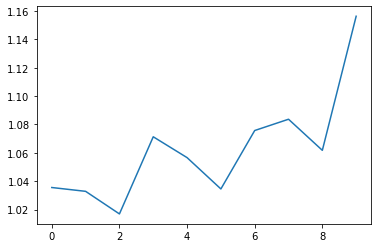

In [133]:
(pd.Series(profits) + 1).cumprod().plot()

<AxesSubplot:xlabel='Time'>

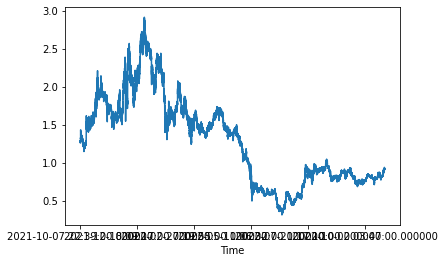

In [18]:
df.Close.plot()

In [384]:

df['MA20'] = df['Close'].rolling(20).mean() # 1440 minutes = 24 H = 1 Jour  !!!
df['MA50'] = df['Close'].rolling(50).mean() # 1440 minutes = 24 H = 1 Jour  !!!
df['MA150'] = df['Close'].rolling(150).mean() # 1440 minutes = 24 H = 1 Jour  !!!
df['MA1400'] = df['Close'].rolling(1440).mean() # 1440 minutes = 24 H = 1 Jour  !!!

In [15]:
df['MA10K'] = df['Close'].rolling(10000).mean() # 1440 minutes = 24 H = 1 Jour  !!!

In [14]:
df['MA4K'] = df['Close'].rolling(4000).mean() # 1440 minutes = 24 H = 1 Jour  !!!

In [16]:
df['MA7K'] = df['Close'].rolling(7000).mean() # 1440 minutes = 24 H = 1 Jour  !!!

<AxesSubplot:xlabel='Time'>

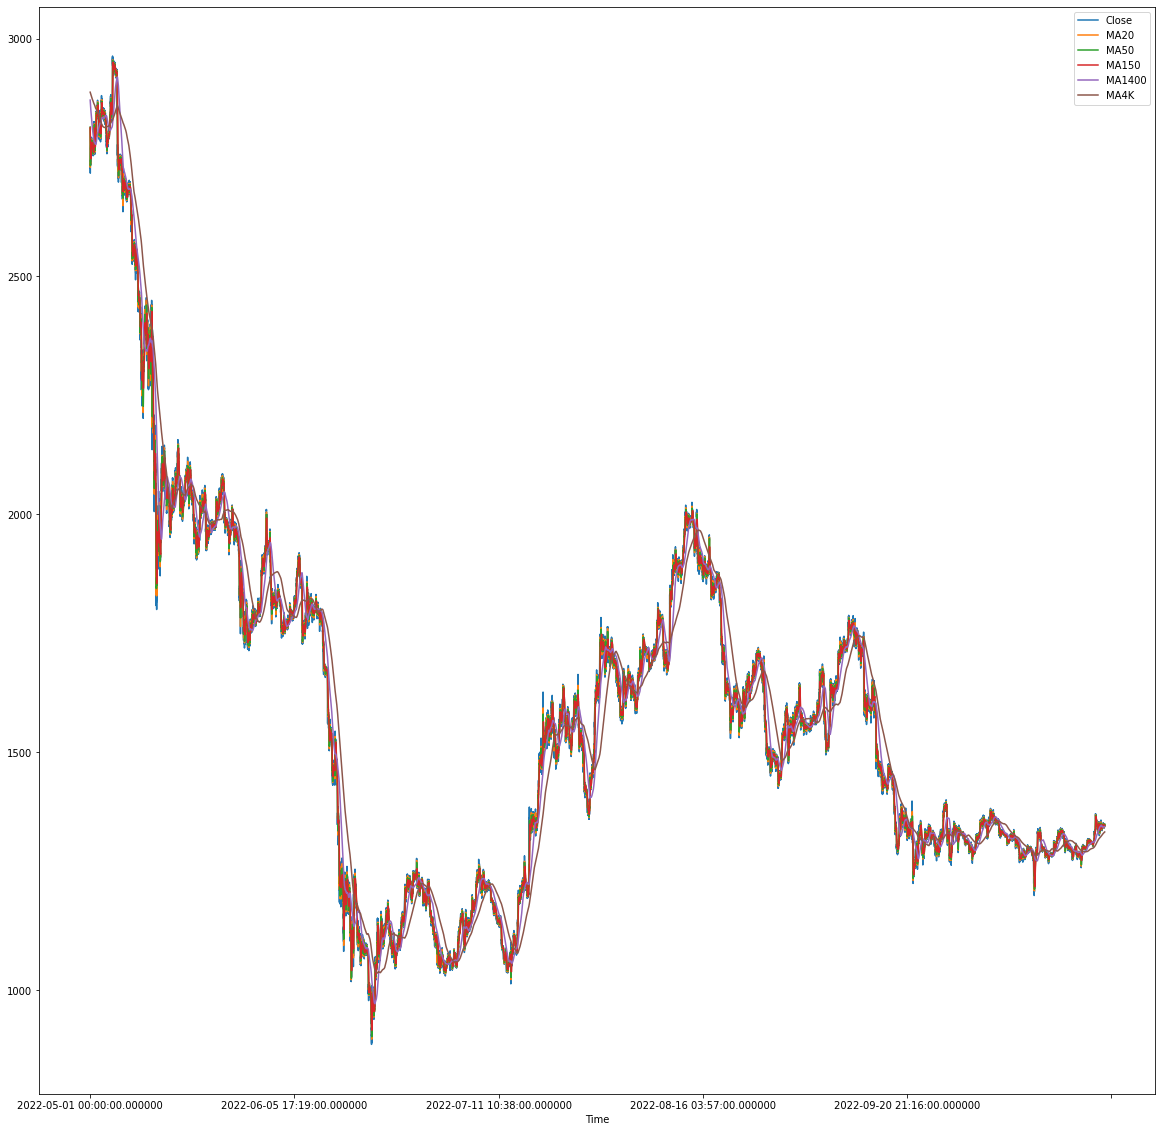

In [398]:
#df[['Close','MA20','MA50','MA150','MA1400','MA10K']]['2022-10-13':'2022-10-14'].plot(figsize=(20,20))
#df[['Close','MA20','MA50','MA150','MA1400','MA10K']]['2022-05-01':'2022-10-29'].plot(figsize=(20,20))
df[['Close','MA20','MA50','MA150','MA1400','MA4K']]['2022-05-01':'2022-10-29'].plot(figsize=(20,20))
#df[['Close']]['2021-10-01':'2021-10-29'].plot(figsize=(20,20))